In [98]:
import numpy as np
import torch
import cv2
import os

In [99]:
dirs = os.listdir('/home/v-daneulkim/videocustom/finetune/ominicontrol_style/attention_maps')

In [100]:
dirs = [k for k in dirs if '.npy' in k]

In [101]:
query_load = np.load('/home/v-daneulkim/videocustom/finetune/ominicontrol_style/attention_maps/' + "query_layer41_timesteptensor([19, 19], device='cuda:0').npy")
key_load = np.load('/home/v-daneulkim/videocustom/finetune/ominicontrol_style/attention_maps/' + "key_layer41_timesteptensor([19, 19], device='cuda:0').npy")

In [102]:
query_load.shape

(2, 48, 2926, 64)

In [103]:
key_load.shape

(2, 48, 2926, 64)

In [104]:
import torch

# Ensure same device
query_load = torch.from_numpy(query_load).to("cuda")
key_load = torch.from_numpy(key_load).to("cuda")

# Ensure same dtype
query_load = query_load.to(torch.float32)
key_load = key_load.to(torch.float32)

# Debug: Print shapes before matrix multiplication
print("Query shape:", query_load.shape)
print("Key shape:", key_load.shape)
print("Transposed Key shape:", key_load.transpose(-2, -1).shape)

# Compute attention scores (QK^T)
attn_scores = torch.matmul(query_load, key_load.transpose(-2, -1))  # (2, 48, 2926, 2926)

# Scale by sqrt(head_dim)
head_dim = query_load.shape[-1]  # 64
attn_scores = attn_scores / (head_dim ** 0.5)

Query shape: torch.Size([2, 48, 2926, 64])
Key shape: torch.Size([2, 48, 2926, 64])
Transposed Key shape: torch.Size([2, 48, 64, 2926])


In [105]:
attn_scores.shape

torch.Size([2, 48, 2926, 2926])

In [106]:
query_load.shape

torch.Size([2, 48, 2926, 64])

In [107]:
1350 / 226 / 1350 (45 * 30)

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_1107371/621306177.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  1350 / 226 / 1350 (45 * 30)
/tmp/ipykernel_1107371/621306177.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  1350 / 226 / 1350 (45 * 30)
/tmp/ipykernel_1107371/621306177.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  1350 / 226 / 1350 (45 * 30)


TypeError: 'int' object is not callable

In [108]:
attn_scores.shape


torch.Size([2, 48, 2926, 2926])

In [109]:
tmp = attn_scores[1, 1]

In [110]:
tmp2 = tmp[..., 1576:]

In [111]:
tmp2.shape

torch.Size([2926, 1350])

In [112]:
tmp2[0,:].shape

torch.Size([1350])

In [113]:
from transformers import AutoTokenizer, T5EncoderModel, T5Tokenizer

In [138]:
tokenizer = AutoTokenizer.from_pretrained(
    "THUDM/CogVideoX-5b", subfolder="tokenizer", revision=None
)
text_encoder = T5EncoderModel.from_pretrained(
    "THUDM/CogVideoX-5b", subfolder="text_encoder", revision=None
)
sentence = "<cls> On the beach, a lady sits under a beach umbrella with 'Omini' written on it. She's wearing hawaiian shirt and has a big smile on her face, with her surfboard hehind her. The sun is setting in the background. The sky is a beautiful shade of orange and purple."
look_up = 'shirt'
special_token = {"additional_special_tokens": ["<cls>"]}
tokenizer.add_special_tokens(special_token)
text_encoder.resize_token_embeddings(len(tokenizer))
tokens = tokenizer.tokenize(sentence)
indexed_tokens = tokenizer.encode(sentence, add_special_tokens=False)

# Find index of 'shirt'
word_idx = [i for i, token in enumerate(tokens) if look_up in token]
                 
# Print tokenized results
print(f"Tokenized Sentence: {tokens}")
print(f"Token Index for '{look_up}': {word_idx}")


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


Tokenized Sentence: ['<cls>', '▁On', '▁the', '▁beach', ',', '▁', 'a', '▁lady', '▁sit', 's', '▁under', '▁', 'a', '▁beach', '▁umbrella', '▁with', '▁', "'", 'O', 'mini', "'", '▁written', '▁on', '▁it', '.', '▁She', "'", 's', '▁wearing', '▁', 'h', 'awa', 'i', 'i', 'an', '▁shirt', '▁and', '▁has', '▁', 'a', '▁big', '▁smile', '▁on', '▁her', '▁face', ',', '▁with', '▁her', '▁surf', 'board', '▁', 'he', 'hin', 'd', '▁her', '.', '▁The', '▁sun', '▁is', '▁setting', '▁in', '▁the', '▁background', '.', '▁The', '▁sky', '▁is', '▁', 'a', '▁beautiful', '▁shade', '▁of', '▁orange', '▁and', '▁purple', '.']
Token Index for 'shirt': [35]


In [139]:
tmp3 = tmp2[1350 + word_idx[0],:].reshape(30, 45)

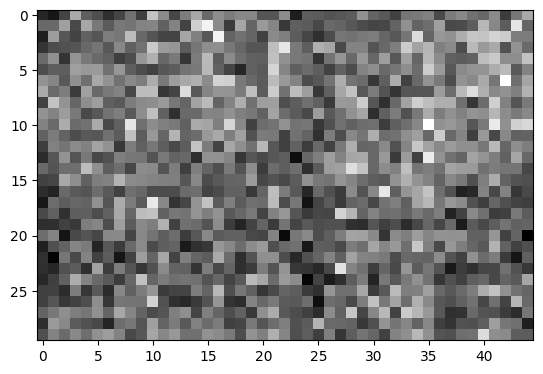

In [140]:
# normlaize tmp3 to 0~1
tmp3 = (tmp3 - tmp3.min()) / (tmp3.max() - tmp3.min())
tmp3 = tmp3.detach().cpu().numpy()
# plot heatmap
import matplotlib.pyplot as plt
plt.imshow(tmp3, cmap='gray', interpolation='nearest')

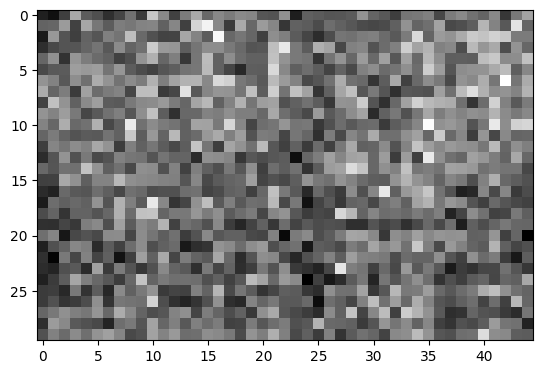

In [137]:
# normlaize tmp3 to 0~1
tmp3 = (tmp3 - tmp3.min()) / (tmp3.max() - tmp3.min())
tmp3 = tmp3.detach().cpu().numpy()
# plot heatmap
import matplotlib.pyplot as plt
plt.imshow(tmp3, cmap='gray', interpolation='nearest')